# Used SMOTE to balance the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
malnutrition = pd.read_csv('Malnutrition data.csv')

In [3]:
df = malnutrition

In [4]:
# List of columns to be removed
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# Creating a new DataFrame with the specified columns removed
df_filtered = df.drop(columns=columns_to_remove, axis=1)

print(df_filtered.head())

   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_filtered.drop("Status", axis=1) 
y = df_filtered["Status"]

smote = SMOTE(k_neighbors=3,random_state=42)

# Applying SMOTE to the whole dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Status")], axis=1)

print(df_resampled.head())


   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [6]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the entire DataFrame
df_resampled

,Sex,Age,Height,Weight,Status
0,1,5,75,17,Stunting
1,0,4,101,13,Stunting
2,0,4,71,17,Stunting
3,0,3,81,13,Stunting
4,0,1,79,16,Stunting
5,1,2,81,12,Stunting
6,1,1,88,9,Overweight
7,0,2,86,15,Stunting
8,0,1,107,13,Stunting
9,0,3,103,17,Stunting


In [7]:
# Printing the number of samples after applying SMOTE
print("\nNumber of samples after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Displaying the resulting DataFrame
print("\nResampled DataFrame:")
print(df_resampled.head())


Number of samples after SMOTE:
Stunting       696
Overweight     696
Underweight    696
Wasting        696
Name: Status, dtype: int64

Resampled DataFrame:
   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [8]:
# Checking for outliers in the dataset

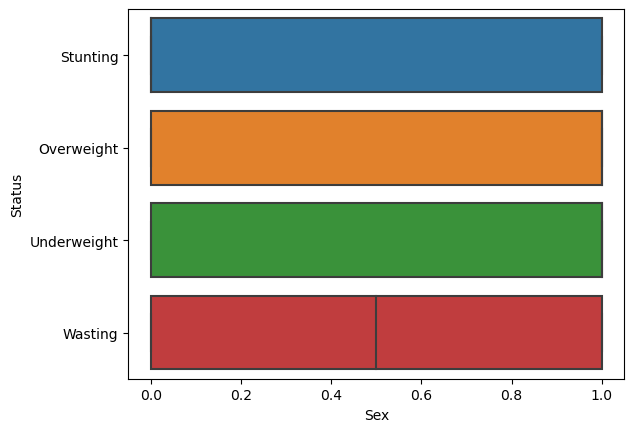

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x='Sex', y='Status', data=df)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y) from the resampled DataFrame
X_resampled = df_resampled.drop("Status", axis=1)
y_resampled = df_resampled["Status"]

# Split the resampled data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Split the temp data into validation (50% of temp, or 15% of the original) and testing (50% of temp, or 15% of the original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the number of samples in each set
print("\nNumber of samples in the training set:")
print(y_train.value_counts())

print("\nNumber of samples in the validation set:")
print(y_val.value_counts())

print("\nNumber of samples in the testing set:")
print(y_test.value_counts())



Number of samples in the training set:
Wasting        498
Overweight     493
Underweight    479
Stunting       478
Name: Status, dtype: int64

Number of samples in the validation set:
Overweight     110
Wasting        106
Underweight    104
Stunting        98
Name: Status, dtype: int64

Number of samples in the testing set:
Stunting       120
Underweight    113
Overweight      93
Wasting         92
Name: Status, dtype: int64


In [11]:
# Using the resampled dataset to generate,
# Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))



Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

  Overweight       0.82      0.78      0.80       110
    Stunting       0.77      0.58      0.66        98
 Underweight       0.78      0.94      0.85       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

  Overweight       0.77      0.84      0.80        93
    Stunting       0.88      0.68      0.77       120
 Underweight       0.84      0.94      0.89       113
     Wasting       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.86      0.85      0.85       418



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_val_pred_encoded = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val_encoded, y_val_pred_encoded)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val_encoded, y_val_pred_encoded))

# Make predictions on the test set
y_test_pred_encoded = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred_encoded)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test_encoded, y_test_pred_encoded))



Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       110
           1       0.77      0.58      0.66        98
           2       0.78      0.94      0.85       104
           3       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        93
           1       0.88      0.68      0.77       120
           2       0.84      0.94      0.89       113
           3       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.86      0.85      0.85       418



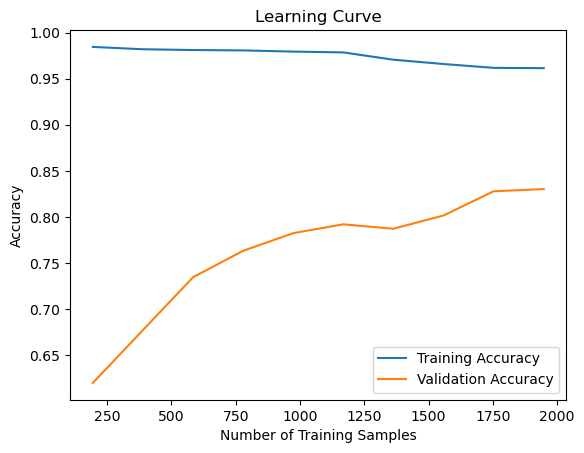

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []
num_training_samples = []

# Vary the size of the training set
train_sizes = np.linspace(0.1, 1.0, 10)

for train_size in train_sizes:
    # Determine the number of samples based on the train_size
    num_samples = int(len(X_train) * train_size)

    # Subset the training data
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]

    # Train the classifier on the subset
    rf_classifier.fit(X_train_subset, y_train_subset)

    # Make predictions on the validation set
    y_val_pred = rf_classifier.predict(X_val)

    # Evaluate the model on the training set
    train_accuracy = accuracy_score(y_train_subset, rf_classifier.predict(X_train_subset))

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store training and validation accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    num_training_samples.append(num_samples)

# Plot the learning curve
plt.plot(num_training_samples, train_accuracies, label='Training Accuracy')
plt.plot(num_training_samples, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [15]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# # Train the classifier on the training data
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = svm_classifier.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Make predictions on the test set
# y_test_pred = svm_classifier.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))


In [16]:
# Using SVM with Grid search.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
    'svc__gamma': [0.01, 0.1, 1, 10],  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Fit the pipeline (including StandardScaler) with training data
svm_classifier.fit(X_train, y_train)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'svc__C': 10, 'svc__gamma': 10}

Validation Set:
Accuracy: 85.17%
              precision    recall  f1-score   support

  Overweight       0.81      0.86      0.83       110
    Stunting       0.82      0.61      0.70        98
 Underweight       0.82      0.92      0.87       104
     Wasting       0.95      0.99      0.97       106

    accuracy                           0.85       418
   macro avg       0.85      0.85      0.84       418
weighted avg       0.85      0.85      0.85       418


Test Set:
Accuracy: 87.80%
              precision    recall  f1-score   support

  Overweight       0.80      0.87      0.84        93
    Stunting       0.91      0.73      0.81       120
 Underweight       0.87      0.95      0.91       113
     Wasting       0.94      0.99      0.96        92

    accuracy                           0.88       418
   macro avg       0.88      0.89      0.88       418
weighted avg       0.88      0.88      0.88       418



In [18]:
#  Learning curve that doesn't combine the training and test data

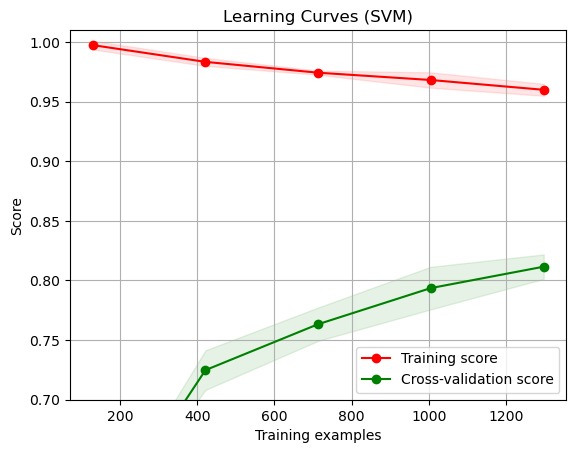

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sample usage
title = "Learning Curves (SVM)"
plot_learning_curve(grid_search.best_estimator_, title, X_train, y_train, X_test, y_test, ylim=(0.7, 1.01), cv=3, n_jobs=-1)
plt.show()


Best Parameters: {'svc__C': 10, 'svc__gamma': 10}

Validation Set:
Accuracy: 85.17%
              precision    recall  f1-score   support

  Overweight       0.81      0.86      0.83       110
    Stunting       0.82      0.61      0.70        98
 Underweight       0.82      0.92      0.87       104
     Wasting       0.95      0.99      0.97       106

    accuracy                           0.85       418
   macro avg       0.85      0.85      0.84       418
weighted avg       0.85      0.85      0.85       418


Test Set:
Accuracy: 87.80%
              precision    recall  f1-score   support

  Overweight       0.80      0.87      0.84        93
    Stunting       0.91      0.73      0.81       120
 Underweight       0.87      0.95      0.91       113
     Wasting       0.94      0.99      0.96        92

    accuracy                           0.88       418
   macro avg       0.88      0.89      0.88       418
weighted avg       0.88      0.88      0.88       418



/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


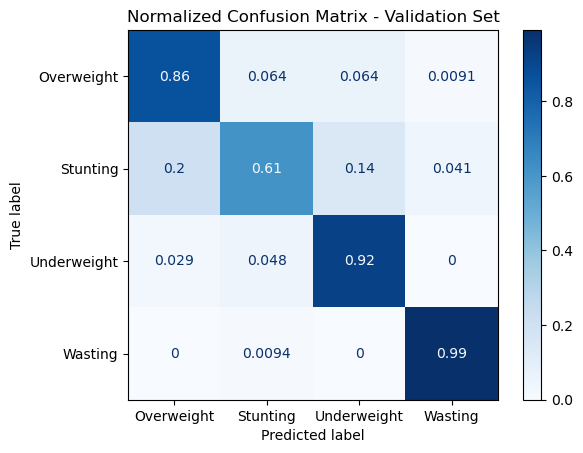

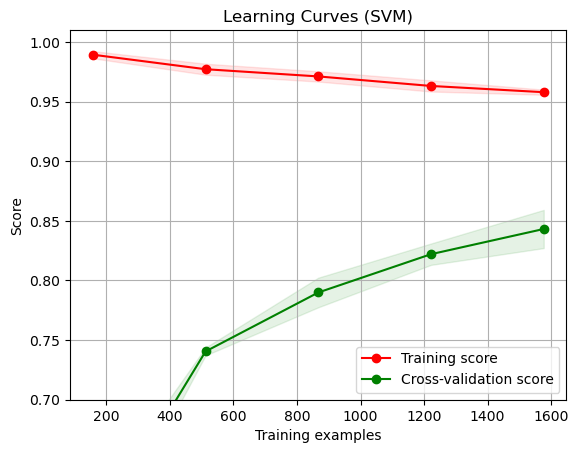

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
    'svc__gamma': [0.01, 0.1, 1, 10],  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Fit the pipeline (including StandardScaler) with training data
svm_classifier.fit(X_train, y_train)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Visualize the confusion matrix for the validation set
disp = plot_confusion_matrix(grid_search, X_val, y_val, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix - Validation Set')
plt.show()

# Modified plot_learning_curve function
def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Combine training and test data
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.concatenate((y_train, y_test))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_combined, y_combined, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sample usage
title = "Learning Curves (SVM)"
plot_learning_curve(grid_search.best_estimator_, title, X_train, y_train, X_test, y_test, ylim=(0.7, 1.01), cv=3, n_jobs=-1)
plt.show()



In [21]:
#  Used label encoding on SVM

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Converting non-numeric labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Defining the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
    'svc__gamma': [0.01, 0.1, 1, 10],  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, probability=True))

# Fit the pipeline (including StandardScaler) with training data
svm_classifier.fit(X_train, y_train_encoded)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_encoded = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val_encoded, y_val_pred_encoded)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val_encoded, y_val_pred_encoded))

# Make predictions on the test set using the best model
y_test_pred_encoded = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred_encoded)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test_encoded, y_test_pred_encoded))


Best Parameters: {'svc__C': 10, 'svc__gamma': 10}

Validation Set:
Accuracy: 85.17%
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.82      0.61      0.70        98
           2       0.82      0.92      0.87       104
           3       0.95      0.99      0.97       106

    accuracy                           0.85       418
   macro avg       0.85      0.85      0.84       418
weighted avg       0.85      0.85      0.85       418


Test Set:
Accuracy: 87.80%
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        93
           1       0.91      0.73      0.81       120
           2       0.87      0.95      0.91       113
           3       0.94      0.99      0.96        92

    accuracy                           0.88       418
   macro avg       0.88      0.89      0.88       418
weighted avg       0.88      0.88      0.88       418



In [23]:
# Using neural networks

In [24]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.metrics import classification_report

# # Generate a sample dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Build the neural network model
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions on the test set
# y_pred_probs = model.predict(X_test)
# y_pred = (y_pred_probs > 0.5).astype(int)

# # Evaluate the model
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [25]:
import joblib

model_filename = 'svm_model.joblib'
joblib.dump(svm_classifier, model_filename)
print(f"Trained SVM model saved to {model_filename}")

Trained SVM model saved to svm_model.joblib


In [26]:
import joblib
import pandas as pd

# Loading the trained SVM model using joblib
model_filename = 'svm_model.joblib'
loaded_pipeline = joblib.load(model_filename)


example_input = {
    "Sex": 1,
    "Age": 1,
    "Height": 13,
    "Weight": 17,
    
}

# Convert the example input to a DataFrame
input_df = pd.DataFrame([example_input])

# Make predictions using the loaded pipeline
prediction = loaded_pipeline.predict(input_df)[0]

# Print or use the prediction
print("Predicted Status:", prediction)



Predicted Status: 1


In [27]:
# After fitting the LabelEncoder on training data
label_encoder.fit(y_train)

# Print the classes and their corresponding numeric labels
print("Original Classes:", label_encoder.classes_)
print("Numeric Labels:", list(range(len(label_encoder.classes_))))

Original Classes: ['Overweight' 'Stunting' 'Underweight' 'Wasting']
Numeric Labels: [0, 1, 2, 3]


In [28]:
import joblib

# Save the trained Random Forest Classifier model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Trained Random Forest model saved to {model_filename}")


Trained Random Forest model saved to random_forest_model.joblib


In [29]:
import joblib
import pandas as pd

# Loading the trained SVM model using joblib
model_filename = 'random_forest_model.joblib'
loaded_pipeline = joblib.load(model_filename)


example_input = {
    "Sex": 0,
    "Age": 1,
    "Height": 70,
    "Weight": 32,
    
}

# Convert the example input to a DataFrame
input_df = pd.DataFrame([example_input])

# Make predictions using the loaded pipeline
prediction = loaded_pipeline.predict(input_df)[0]

# Print or use the prediction
print("Predicted Status:", prediction)

Predicted Status: Stunting


In [30]:
# !pip install fastapi

In [31]:
# !pip install fastapi uvicorn

In [32]:
# pip install --upgrade fastapi


In [33]:
# from fastapi import FastAPI
# import joblib
# import pandas as pd

# app = FastAPI()

# # Load the SVM model using joblib
# model_filename = 'svm_model.joblib'
# loaded_pipeline = joblib.load(model_filename)

# @app.post("/predict")
# def predict(input_data: dict):
#     # Convert the input data to a DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Make predictions using the loaded pipeline
#     prediction = loaded_pipeline.predict(input_df)[0]

#     return {"prediction": prediction}


In [34]:
# uvicorn app:app --reload


In [43]:
import requests

example_input = {
    "Sex": 1,
    "Age": 3,
    "Height": 70,
    "Weight": 12
}

response = requests.post("http://localhost:8000/predict", json=example_input)
print(response.json())


{'prediction': 'Underweight'}


In [36]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Convert non-numeric labels to numeric using LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Create classifiers
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# svm_classifier = SVC(kernel='linear', C=1)

# # Train the classifiers on the training data
# rf_classifier.fit(X_train, y_train_encoded)
# svm_classifier.fit(X_train, y_train_encoded)

# # Make predictions on the test set
# y_test_pred_rf = rf_classifier.predict(X_test)
# y_test_pred_svm = svm_classifier.predict(X_test)

# # Evaluate the models on the test set
# accuracy_rf = accuracy_score(y_test_encoded, y_test_pred_rf)
# accuracy_svm = accuracy_score(y_test_encoded, y_test_pred_svm)

# print("\nRandom Forest Test Set:")
# print(f"Accuracy: {accuracy_rf:.2%}")

# print("\nSVM Test Set:")
# print(f"Accuracy: {accuracy_svm:.2%}")

# # Learning curve
# title = "Learning Curves (Random Forest vs SVM)"
# cv = 3  # Number of cross-validation folds

# # Create a subplot with two rows and two columns
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

# # Loop over the classifiers
# for ax_idx, (X, y, estimator) in enumerate(
#     zip(
#         [X_train, X_test],
#         [y_train_encoded, y_test_encoded],
#         [rf_classifier, svm_classifier],  # Use your RandomForestClassifier and SVM
#     )
# ):
#     # Learning curve
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=-1, return_times=True
#     )

#     # Scalability regarding the fit time
#     ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
#     ax[0, ax_idx].fill_between(
#         train_sizes,
#         fit_times.mean(axis=1) - fit_times.std(axis=1),
#         fit_times.mean(axis=1) + fit_times.std(axis=1),
#         alpha=0.3,
#     )
#     ax[0, ax_idx].set_ylabel("Fit time (s)")
#     ax[0, ax_idx].set_title(f"Scalability of the {estimator.__class__.__name__} classifier")

#     # Scalability regarding the score time
#     ax[1, ax_idx].plot(train_sizes, test_scores.mean(axis=1), "o-", label="Validation Score")
#     ax[1, ax_idx].plot(train_sizes, train_scores.mean(axis=1), "o-", label="Training Score")
#     ax[1, ax_idx].set_ylabel("Score")
#     ax[1, ax_idx].set_xlabel("Number of training samples")
#     ax[1, ax_idx].legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [37]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import time
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Lists to store fit time, score time, and number of training samples
# fit_times = []
# score_times = []
# num_training_samples = []

# # Vary the size of the training set
# train_sizes = np.linspace(0.1, 1.0, 10)

# for train_size in train_sizes:
#     # Determine the number of samples based on the train_size
#     num_samples = int(len(X_train) * train_size)

#     # Subset the training data
#     X_train_subset = X_train[:num_samples]
#     y_train_subset = y_train[:num_samples]

#     # Measure fit time
#     start_time = time.time()
#     rf_classifier.fit(X_train_subset, y_train_subset)
#     fit_time = time.time() - start_time

#     # Measure score time on validation set
#     start_time = time.time()
#     y_val_pred = rf_classifier.predict(X_val)
#     score_time = time.time() - start_time

#     # Store fit time, score time, and number of training samples
#     fit_times.append(fit_time)
#     score_times.append(score_time)
#     num_training_samples.append(num_samples)

# # Plot the learning curve for fit time
# plt.plot(num_training_samples, fit_times, label='Fit Time')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Fit Time (seconds)')
# plt.title('Learning Curve - Fit Time')
# plt.legend()
# plt.show()

# # Plot the learning curve for score time
# plt.plot(num_training_samples, score_times, label='Score Time')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Score Time (seconds)')
# plt.title('Learning Curve - Score Time')
# plt.legend()
# plt.show()


In [38]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import time
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# # Create an SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)

# # Lists to store fit time, score time, and number of training samples
# fit_times_svm = []
# score_times_svm = []
# num_training_samples_svm = []

# # Vary the size of the training set
# train_sizes_svm = np.linspace(0.1, 1.0, 10)

# for train_size in train_sizes_svm:
#     # Determine the number of samples based on the train_size
#     num_samples = int(len(X_train) * train_size)

#     # Subset the training data
#     X_train_subset = X_train[:num_samples]
#     y_train_subset = y_train[:num_samples]

#     # Measure fit time for SVM
#     start_time = time.time()
#     svm_classifier.fit(X_train_subset, y_train_subset)
#     fit_time_svm = time.time() - start_time

#     # Measure score time on validation set for SVM
#     start_time = time.time()
#     y_val_pred_svm = svm_classifier.predict(X_val)
#     score_time_svm = time.time() - start_time

#     # Store fit time, score time, and number of training samples for SVM
#     fit_times_svm.append(fit_time_svm)
#     score_times_svm.append(score_time_svm)
#     num_training_samples_svm.append(num_samples)

# # Plot the learning curve for fit time for SVM
# plt.plot(num_training_samples_svm, fit_times_svm, label='Fit Time (SVM)')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Fit Time (seconds)')
# plt.title('Learning Curve - Fit Time (SVM)')
# plt.legend()
# plt.show()

# # Plot the learning curve for score time for SVM
# plt.plot(num_training_samples_svm, score_times_svm, label='Score Time (SVM)')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Score Time (seconds)')
# plt.title('Learning Curve - Score Time (SVM)')
# plt.legend()
# plt.show()


In [39]:
# Trying out Naive Bayes

In [40]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score

# # Create a Multinomial Naive Bayes classifier
# nb_classifier = MultinomialNB()

# # Train the classifier on the training data
# nb_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = nb_classifier.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Make predictions on the test set
# y_test_pred = nb_classifier.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))
